In [12]:
import colorsys
import cv2

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb

import pandas as pd
from pandas import DataFrame, Series
from pandas.io.json import json_normalize 

from urllib.request import urlopen
import requests

from time import time
import datetime

'''
get color data for memes analysis
'''

'\nconvert given rgb to hsv range for opencv masking\n'

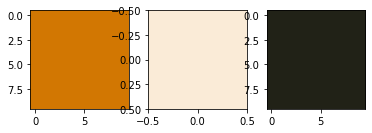

In [13]:
# functions to convert an rgb color to a range in hsv that can be used to mask the images
def rgb_hsv_converter(rgb):
    (r,g,b) = rgb_normalizer(rgb)
    hsv = colorsys.rgb_to_hsv(r,g,b)
    (h,s,v) = hsv_normalizer(hsv)
    upper_band = [h+10, s+40, v+40] 
    lower_band = [h-10, s-40, v-40]                     
    return {
        'upper_band': upper_band,
        'lower_band': lower_band
    }

def rgb_normalizer(rgb):
    (r,g,b) = rgb
    return (r/255, g/255, b/255)

def hsv_normalizer(hsv):
    (h,s,v) = hsv
    return (h*360, s*255, v*255)

# display range of colors to check functions
rgb = (250,235,215) # green: (128, 255, 0)
dict_colors = rgb_hsv_converter(rgb)

color_2 = tuple(dict_colors['lower_band'])
color_1 = tuple(dict_colors['upper_band'])

do_square = np.full((10, 10, 3), color_2, dtype=np.uint8) / 255.0
lo_square = np.full((10, 10, 3), color_1, dtype=np.uint8) / 255.0

plt.subplot(1, 3, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 3, 2)
plt.imshow([[rgb]]) 
plt.subplot(1, 3, 3)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

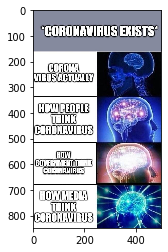

this meme has 1.8962617924528302 per pixel of ~ antique white ~


In [14]:
# check how these colors work ask masks for our memes

# import data
df = pd.read_json ('./partial_df.json')

# get an image from media attr to analyze
def url_to_image(url):
    try: 
        request = requests.get(url)
        get_image = urlopen(url)
        arr_image = np.asarray(bytearray(get_image.read()), dtype="uint8") 
        image = cv2.imdecode(arr_image, cv2.IMREAD_COLOR)
    except:
        image = np.array([None,None,None])   
    return image

# function gets data about the amount of one color in image, sum of pixel values for that color over total # of pixels
def getColorMask(meme,color_1,color_2):
    hsv_meme1 = cv2.cvtColor(meme, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(hsv_meme1, color_1, color_2)
    result = cv2.bitwise_and(meme, meme, mask=mask)
    return (np.sum(mask)/(meme.shape[0]*meme.shape[1]))

# check
row = df.iloc[10]; test_url = row['media']
im = url_to_image(test_url)
meme1 = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(meme1)
plt.show()

print("this meme has", getColorMask(meme1,color_2,color_1), "per pixel of ~ antique white ~")

In [15]:
# define the rgb colors to extract from memes

rgb_colors = [(250,235,215),
              (127,255,212),
              (227,207,87),
              (0,0,0),
              (138,43,226),
              (165,42,42),
              (139,115,85),
              (83,134,139),
              (255,97,3),
              (255,127,80),
              (0,100,0),
              (255,20,147),
              (248,248,255),
              (173,255,47),
              (255,255,0)
             ]
colr_dict = { 'off-white': [],
              'aqua': [],
              'mustard': [],
              'black': [],
              'purple': [],
              'red-brown': [],
              'dust-brown': [],
              'gray-blue': [],
              'orange': [],
              'salmon': [],
              'dark-green': [],
              'pink': [],
              'white': [],
              'yellow-green': [],
              'bright-yellow': []
            }

In [85]:
t0 = time()
for i in range(0,len(df)): 
    try:
        url = df.iloc[i]['media']
        im = url_to_image(url)
        meme = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        counter = 0
        for key in colr_dict:
            dict_colors = rgb_hsv_converter(rgb_colors[counter])
            color_2 = tuple(dict_colors['lower_band'])
            color_1 = tuple(dict_colors['upper_band'])
            colr_dict[key].append(getColorMask(meme,color_2,color_1))
            counter += 1
    except:
        for key in colr_dict:
            colr_dict[key].append(None)
        print("bah")
t1 = time()   
print('seconds to run: %f' %(t1-t0))
colr_dict

bah
bah
bah
bah
bah
bah
bah
bah
bah
bah
bah
bah
bah
bah
bah
bah
bah
bah
bah
seconds to run: 6561.188749


{'off-white': [1.0829661885245903,
  3.0639123916625977,
  29.55813292809094,
  0.4025710419485792,
  1.3958097395243487,
  5.354477611940299,
  0.6951335311572701,
  6.4738493723849375,
  15.548839330968068,
  0.019101123595505618,
  1.8962617924528302,
  3.6859894178372703,
  1.2911475409836066,
  1.18575,
  9.42042741165234,
  0.0,
  0.0,
  5.293564961195746,
  5.600776284427966,
  0.9382630222463375,
  2.790943816648098,
  5.074633113365508,
  5.074633113365508,
  0.8612372162634073,
  2.2222046834432803,
  7.378637977374839,
  2.002666961242267,
  1.2472587719298245,
  10.39769622328368,
  0.0,
  0.4341766239245408,
  0.0,
  0.0,
  0.029998190154440156,
  15.825313183535494,
  0.032373046875,
  0.0824353448275862,
  1.4407944610097538,
  8.256510416666666,
  4.092902723048874,
  4.393458950201884,
  0.9903040870637211,
  11.314995334431893,
  0.6886881510416667,
  0.0,
  21.664453125,
  2.161666100300024,
  0.8533793264733396,
  1.6936711787120742,
  1.6936711787120742,
  6.205484

In [86]:
for key in colr_dict:
    df[key] = colr_dict[key]
df.head()
# save new data frame to json file
df.to_json(r'./dank_cleaned.json')

5582

In [17]:
more_colors = [(60,179,113),
               (30,144,255),
               (221,160,221),
               (139,69,19),
               (199,21,133),
               (72,61,139),
               (25,25,112),
               (95,158,160),
               (0,250,154),
               (128,128,0),
               (255,99,71),
               (34,139,34)
              ]
more_colDic = { 'c1': [],
               'c2': [],
               'c3': [],
               'c4': [],
              'c5': [],
               'c6': [],
               'c7': [],
               'c8': [],
               'c9': [],
               'c10': [],
               'c11': [],
               'c12': []
              }


In [18]:
t0 = time()
for i in dank_indexes: 
    try:
        url = df.iloc[i]['media']
        im = url_to_image(url)
        meme = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        counter = 0
        for key in more_colDic:
            dict_colors = rgb_hsv_converter(more_colors[counter])
            color_2 = tuple(dict_colors['lower_band'])
            color_1 = tuple(dict_colors['upper_band'])
            more_colDic[key].append(getColorMask(meme,color_2,color_1))
            counter += 1
    except:
        for key in more_colDic:
            more_colDic[key].append(None)
        print("bah")
t1 = time()   
print('seconds to run: %f' %(t1-t0))
more_colDic

bah
seconds to run: 277.175949


{'c1': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.6791726020892688,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0004226332537788385,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.13187971906833118,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0004937267657992565,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.005168918918918919,
  0.0,
  0.0,
  0.0,
  0.0,
  0.00011659807956104253,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  

In [20]:
dank_avgs = []
for label in more_colDic:
    dank_avgs.append( (sum(more_colDic[label][137:271])+sum(more_colDic[label][0:136])) / len(more_colDic[label]) )
print(dank_avgs) 

[0.02201377168876531, 0.0, 0.0, 1.2927500111782941, 0.0, 0.0, 0.0, 0.6852466922924951, 0.0, 0.011879838155030445, 1.0318146363000185, 0.38893842676016294]
